In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.metrics import confusion_matrix
from sklearn import tree

import itertools

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

from transcriptomics.visualization import figures as fig
from transcriptomics import gec_functions_ana as ana 
from transcriptomics.constants import Defaults

%matplotlib inline

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [420]:
fig.plotting_style()

ValueError: X has 157 features per sample; expecting 156

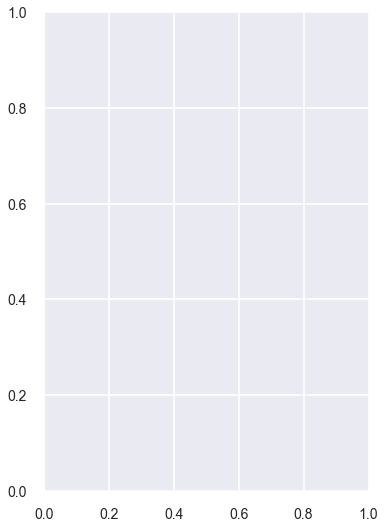

In [421]:
fig.supp_5_new(atlas='SUIT-10')

In [360]:
def accuracy(actual, pred):
    return np.mean(actual == pred)

def predict_prob(X, y):
    model = lm.LogisticRegression(fit_intercept = False, C=1e9, solver='lbfgs')
    model.fit(X.T, y)
    beta = model.coef_[0]
    
    return sigma(X.T @ beta)

# Default threshold is 0.5, but we can change it
def classify(vals, threshold = 0.5):
    return np.int64(vals >= threshold)

In [235]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def lr_loss(beta, X, Y):
    '''
    Compute the cross entropy loss using Phi, Y and beta. Hint: # The notation B @ v means: 
    compute the matrix multiplication Bv 

    Args:
        beta: The model parameters. 
        Phi: The transformed input data \phi(X)
        Y: The label 

    Return:
        The cross entropy loss.
    '''
    # BEGIN SOLUTION
    z = sigmoid(X @ beta) 
    loss = -np.mean((Y * np.log(z)) + ((1 - Y) * np.log(1 - z))) 
    return loss